In [1]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [2]:
from keras.utils import to_categorical

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D

model = Sequential()

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Classifying
model.add(GlobalAveragePooling2D()) # change this line
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [5]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
from keras.preprocessing.image import ImageDataGenerator
import keras

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 10:
        lrate = 0.0005
    if epoch > 20:
        lrate = 0.0001
    if epoch > 30:
        lrate = 0.00005
    return lrate

checkpoint = keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True)
# 100번의 연속적인 epoch 동안 개선이 없을 때 학습이 중단되도록 함
early_stopping = keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True)

In [7]:
from keras.callbacks import LearningRateScheduler

history = model.fit(train_images, train_labels, batch_size=128, epochs=150,  validation_split=0.1,
                    callbacks = [checkpoint, early_stopping, LearningRateScheduler(lr_schedule)])

Epoch 1/150
352/352 [==============================] - 22s 35ms/step - loss: 1.4510 - acc: 0.4706 - val_loss: 4.1325 - val_acc: 0.1002 - lr: 0.0010
Epoch 2/150
352/352 [==============================] - 11s 32ms/step - loss: 1.0176 - acc: 0.6352 - val_loss: 1.0241 - val_acc: 0.6376 - lr: 0.0010
Epoch 3/150
352/352 [==============================] - 11s 32ms/step - loss: 0.8535 - acc: 0.6984 - val_loss: 0.9478 - val_acc: 0.6670 - lr: 0.0010
Epoch 4/150
352/352 [==============================] - 11s 31ms/step - loss: 0.7412 - acc: 0.7397 - val_loss: 0.9498 - val_acc: 0.6838 - lr: 0.0010
Epoch 5/150
352/352 [==============================] - 11s 32ms/step - loss: 0.6562 - acc: 0.7711 - val_loss: 0.8296 - val_acc: 0.7246 - lr: 0.0010
Epoch 6/150
352/352 [==============================] - 11s 32ms/step - loss: 0.5844 - acc: 0.7976 - val_loss: 1.0789 - val_acc: 0.6690 - lr: 0.0010
Epoch 7/150
352/352 [==============================] - 12s 35ms/step - loss: 0.5424 - acc: 0.8113 - val_loss: 0.

In [8]:
from keras.models import load_model

model = load_model('best_cnn_model.h5')
# model.save('main_model_0.864.h5')

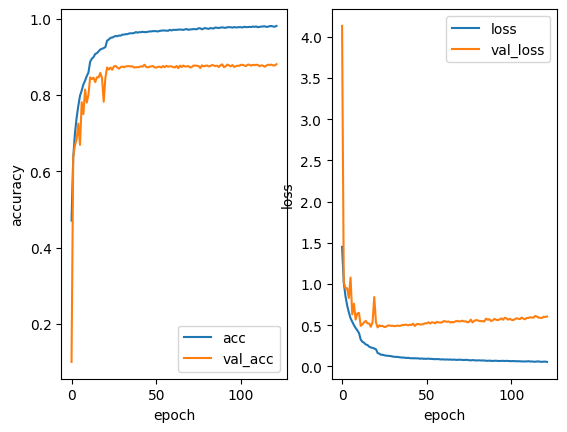

313/313 - 3s - loss: 0.4914 - acc: 0.8644 - 3s/epoch - 10ms/step


In [9]:
import matplotlib.pyplot as plt

plt.figure()

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')

plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)